In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/image_recongnition_cnn_cifar')



In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from models.KANConvolutional import ConvRBFKAN
from utils.train_eval import train_eval_model
from utils.plot_metric import plot_metric
import numpy as np

In [4]:
model =ConvRBFKAN(
            img_size= 64,
            in_chans= 3,
            out_chans1= 32,
            out_chans2= 64,
            kernal_size = 3,
            pool_size = 2,
            hidden_dim = 128,
            num_classes = 10,
            num_grids = 2
            )

In [5]:
epochs = 50
lr = 1e-4
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
train_losses, train_accuracies, test_losses, test_accuracies = train_eval_model(
    model,
    optimizer=optimizer,
    criterion=criterion,
    epochs=epochs,
    dataset_name='cifar10',
    img_res=64,
    batch_size=64,
    device=device
)

Epoch [1/50] - Train Loss: 2.1858 - Train Accuracy: 22.2120%
Epoch [1/50] - Test Loss: 1.9476 - Test Accuracy: 29.6300%
Epoch [2/50] - Train Loss: 1.8820 - Train Accuracy: 32.5040%
Epoch [2/50] - Test Loss: 1.8542 - Test Accuracy: 33.3300%
Epoch [3/50] - Train Loss: 1.7448 - Train Accuracy: 37.7860%
Epoch [3/50] - Test Loss: 1.6866 - Test Accuracy: 39.2800%
Epoch [4/50] - Train Loss: 1.6833 - Train Accuracy: 40.4540%
Epoch [4/50] - Test Loss: 1.6623 - Test Accuracy: 41.5800%
Epoch [5/50] - Train Loss: 1.6236 - Train Accuracy: 42.6620%
Epoch [5/50] - Test Loss: 1.5610 - Test Accuracy: 44.9600%
Epoch [6/50] - Train Loss: 1.6007 - Train Accuracy: 43.5840%
Epoch [6/50] - Test Loss: 1.5928 - Test Accuracy: 43.7700%
Epoch [7/50] - Train Loss: 1.5549 - Train Accuracy: 45.0900%
Epoch [7/50] - Test Loss: 1.5816 - Test Accuracy: 44.9400%
Epoch [8/50] - Train Loss: 1.5422 - Train Accuracy: 45.8880%
Epoch [8/50] - Test Loss: 1.6159 - Test Accuracy: 43.5300%
Epoch [9/50] - Train Loss: 1.5147 - Trai

In [7]:
train_accuracies = np.array(train_accuracies)
test_acc = np.array(test_accuracies)
epochs = np.arange(0, len(train_accuracies))

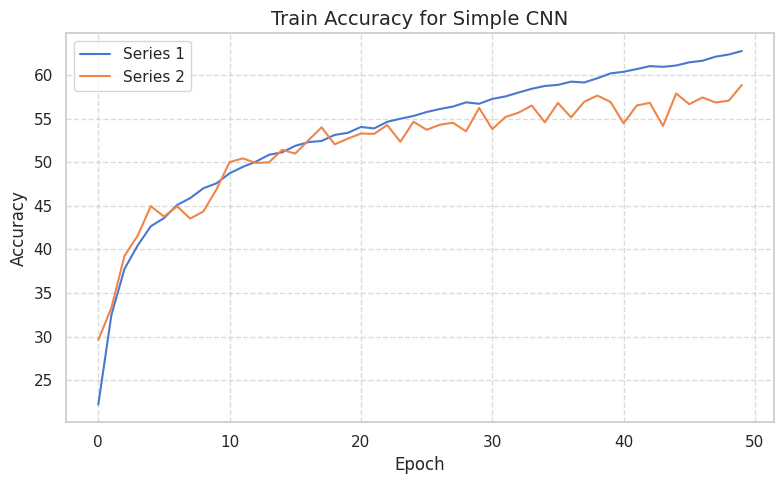

In [8]:

plot_metric(
    x=epochs,
    y_list=[train_accuracies, test_acc],
    y_label='Accuracy',
    title='Train Accuracy for Simple CNN',
    labels=None
)